In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read COVID-19 data file
covid19data_path = "Resources/CRDTData.csv"
covid19_initial = pd.read_csv(covid19data_path)

covid19_initial

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210307,AK,59332.0,18300.0,1499.0,NaN,2447.0,12238.0,1508.0,4453.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210307,AZ,826454.0,308453.0,25775.0,244539.0,11921.0,40707.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,20200412,VT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5316,20200412,WA,10411.0,2903.0,289.0,1180.0,451.0,41.0,61.0,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,20200412,WI,3341.0,1680.0,857.0,NaN,81.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5318,20200412,WV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
covid19_initial_results = covid19_initial.loc[covid19_initial['Date'] == 20210307]
covid19_initial_results

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210307,AK,59332.0,18300.0,1499.0,NaN,2447.0,12238.0,1508.0,4453.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210307,AZ,826454.0,308453.0,25775.0,244539.0,11921.0,40707.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20210307,CA,3501394.0,546630.0,111279.0,1509103.0,186562.0,9025.0,15281.0,42824.0,...,9444459.0,3980518.0,98894.0,222513.0,74171.0,6354689.0,18567612.0,9444459.0,21633943.0,18567612.0
6,20210307,CO,435762.0,181669.0,12637.0,119224.0,6406.0,2527.0,1264.0,6580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20210307,CT,285330.0,85469.0,19651.0,41523.0,3019.0,393.0,NaN,17642.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20210307,DC,41419.0,10708.0,20164.0,NaN,914.0,86.0,82.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20210307,DE,88354.0,42730.0,19768.0,14532.0,1842.0,NaN,NaN,NaN,...,55204.0,16091.0,NaN,NaN,NaN,58282.0,74345.0,55204.0,503875.0,74345.0


In [5]:
#Create Case Total Dataframe
covid_case_totals = covid19_initial_results.groupby(['State']).sum()[['Cases_White', 'Cases_Black',
                                                                      'Cases_Asian', 'Cases_Ethnicity_Hispanic']]

covid_case_totals.head()

,Cases_White,Cases_Black,Cases_Asian,Cases_Ethnicity_Hispanic
State,,,,
AK,18300.0,1499.0,2447.0,3197.0
AL,160347.0,82790.0,2273.0,12312.0
AR,207596.0,50842.0,2913.0,34332.0
AS,0.0,0.0,0.0,0.0
AZ,308453.0,25775.0,11921.0,244539.0


In [6]:
#Re-Index 
#covid_case_totals.reset_index().head()
covid_case_totals = covid_case_totals.reset_index()

In [7]:
#Case Totals for neighboring states
covid_case_totals_nbr = covid_case_totals.loc[(covid_case_totals['State'] == 'AL') |
                                              (covid_case_totals['State'] == 'GA') |
                                              (covid_case_totals['State'] == 'KY') |
                                              (covid_case_totals['State'] == 'NC') |
                                              (covid_case_totals['State'] == 'SC') |
                                              (covid_case_totals['State'] == 'TN') |
                                              (covid_case_totals['State'] == 'VA') ]

covid_case_totals_nbr

,State,Cases_White,Cases_Black,Cases_Asian,Cases_Ethnicity_Hispanic
1,AL,160347.0,82790.0,2273.0,12312.0
11,GA,319208.0,216068.0,17888.0,85460.0
19,KY,286431.0,26883.0,3680.0,17452.0
30,NC,442322.0,146993.0,13620.0,118914.0
44,SC,238659.0,107296.0,5178.0,29233.0
46,TN,489782.0,102220.0,6937.0,48832.0
49,VA,235269.0,99166.0,19984.0,76875.0


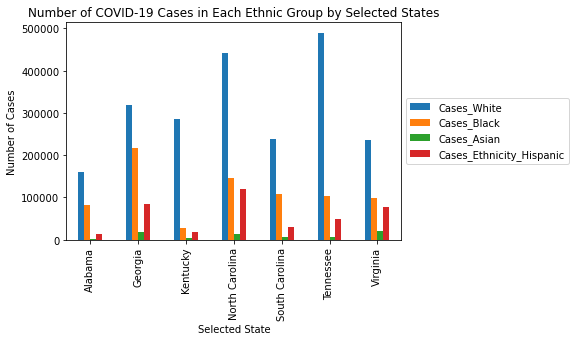

In [15]:
#Bar Chart for Total Cases in each State
states = ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"]
x_axis = np.arange(len(states))

covid_case_totals_nbr.plot(kind='bar')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"])
plt.title("Number of COVID-19 Cases in Each Ethnic Group by Selected States")
plt.xlabel("Selected State")
plt.ylabel("Number of Cases")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [9]:
#Create Death Total Dataframe
covid_death_totals = covid19_initial_results.groupby(['State']).sum()[['Deaths_White', 'Deaths_Black',
                                                                      'Deaths_Asian', 'Deaths_Ethnicity_Hispanic']]

covid_death_totals.head()

,Deaths_White,Deaths_Black,Deaths_Asian,Deaths_Ethnicity_Hispanic
State,,,,
AK,127.0,9.0,29.0,13.0
AL,4730.0,2223.0,24.0,137.0
AR,4171.0,784.0,36.0,186.0
AS,0.0,0.0,0.0,0.0
AZ,8066.0,433.0,220.0,4684.0


In [10]:
#covid_deaths_totals.reset_index().head()
covid_death_totals = covid_death_totals.reset_index()

In [11]:
#death totals on nearby states
covid_death_totals_nbr = covid_death_totals.loc[(covid_death_totals['State'] == 'AL') |
                                              (covid_death_totals['State'] == 'GA') |
                                              (covid_death_totals['State'] == 'KY') |
                                              (covid_death_totals['State'] == 'NC') |
                                              (covid_death_totals['State'] == 'SC') |
                                              (covid_death_totals['State'] == 'TN') |
                                              (covid_death_totals['State'] == 'VA') ]

covid_death_totals_nbr

,State,Deaths_White,Deaths_Black,Deaths_Asian,Deaths_Ethnicity_Hispanic
1,AL,4730.0,2223.0,24.0,137.0
11,GA,8939.0,5282.0,298.0,852.0
19,KY,3981.0,371.0,23.0,73.0
30,NC,7160.0,2662.0,120.0,803.0
44,SC,4727.0,2408.0,54.0,211.0
46,TN,8730.0,1994.0,67.0,303.0
49,VA,6002.0,2262.0,337.0,640.0


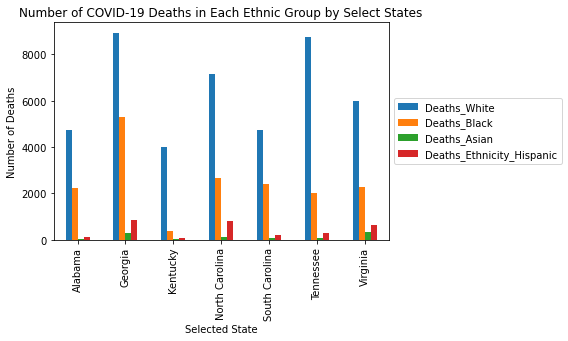

In [12]:
#Bar Chart for Total Cases in each State
states = ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"]
x_axis = np.arange(len(states))

covid_death_totals_nbr.plot(kind='bar')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"])
plt.title("Number of COVID-19 Deaths in Each Ethnic Group by Select States")
plt.xlabel("Selected State")
plt.ylabel("Number of Deaths")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [13]:
#Merge Dataframes
covid_merge = pd.merge(covid_case_totals_nbr, covid_death_totals_nbr, on="State", how="inner")
covid_merge

,State,Cases_White,Cases_Black,Cases_Asian,Cases_Ethnicity_Hispanic,Deaths_White,Deaths_Black,Deaths_Asian,Deaths_Ethnicity_Hispanic
0,AL,160347.0,82790.0,2273.0,12312.0,4730.0,2223.0,24.0,137.0
1,GA,319208.0,216068.0,17888.0,85460.0,8939.0,5282.0,298.0,852.0
2,KY,286431.0,26883.0,3680.0,17452.0,3981.0,371.0,23.0,73.0
3,NC,442322.0,146993.0,13620.0,118914.0,7160.0,2662.0,120.0,803.0
4,SC,238659.0,107296.0,5178.0,29233.0,4727.0,2408.0,54.0,211.0
5,TN,489782.0,102220.0,6937.0,48832.0,8730.0,1994.0,67.0,303.0
6,VA,235269.0,99166.0,19984.0,76875.0,6002.0,2262.0,337.0,640.0


In [14]:
covid_merge['Death Percentage White'] = (covid_merge['Deaths_White'] / covid_merge['Cases_White']) * 100
covid_merge['Death Percentage Black'] = (covid_merge['Deaths_Black'] / covid_merge['Cases_Black']) * 100
covid_merge['Death Percentage Asian'] = (covid_merge['Deaths_Asian'] / covid_merge['Cases_Asian']) * 100
covid_merge['Death Percentage Hispanic'] = (covid_merge['Deaths_Ethnicity_Hispanic'] / covid_merge['Cases_Ethnicity_Hispanic']) * 100
covid_merge

,State,Cases_White,Cases_Black,Cases_Asian,Cases_Ethnicity_Hispanic,Deaths_White,Deaths_Black,Deaths_Asian,Deaths_Ethnicity_Hispanic,Death Percentage White,Death Percentage Black,Death Percentage Asian,Death Percentage Hispanic
0,AL,160347.0,82790.0,2273.0,12312.0,4730.0,2223.0,24.0,137.0,2.949853,2.685107,1.055873,1.112736
1,GA,319208.0,216068.0,17888.0,85460.0,8939.0,5282.0,298.0,852.0,2.800368,2.444601,1.665921,0.996958
2,KY,286431.0,26883.0,3680.0,17452.0,3981.0,371.0,23.0,73.0,1.389864,1.380054,0.625000,0.418290
3,NC,442322.0,146993.0,13620.0,118914.0,7160.0,2662.0,120.0,803.0,1.618730,1.810971,0.881057,0.675278
4,SC,238659.0,107296.0,5178.0,29233.0,4727.0,2408.0,54.0,211.0,1.980650,2.244259,1.042874,0.721787
5,TN,489782.0,102220.0,6937.0,48832.0,8730.0,1994.0,67.0,303.0,1.782426,1.950695,0.965835,0.620495
6,VA,235269.0,99166.0,19984.0,76875.0,6002.0,2262.0,337.0,640.0,2.551122,2.281024,1.686349,0.832520


In [16]:
covid_merge_perc = covid_merge.loc[:, ['State', 'Death Percentage White', 'Death Percentage Black', 'Death Percentage Asian', 'Death Percentage Hispanic']]
covid_merge_perc

,State,Death Percentage White,Death Percentage Black,Death Percentage Asian,Death Percentage Hispanic
0,AL,2.949853,2.685107,1.055873,1.112736
1,GA,2.800368,2.444601,1.665921,0.996958
2,KY,1.389864,1.380054,0.625000,0.418290
3,NC,1.618730,1.810971,0.881057,0.675278
4,SC,1.980650,2.244259,1.042874,0.721787
5,TN,1.782426,1.950695,0.965835,0.620495
6,VA,2.551122,2.281024,1.686349,0.832520


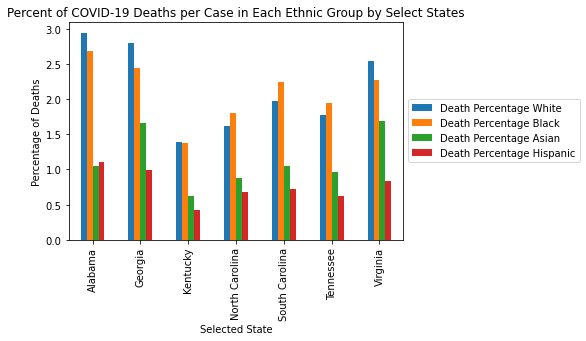

In [17]:
#Bar Chart for Total Cases in each State
states = ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"]
x_axis = np.arange(len(states))

covid_merge_perc.plot(kind='bar')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"])
plt.title("Percent of COVID-19 Deaths per Case in Each Ethnic Group by Select States")
plt.xlabel("Selected State")
plt.ylabel("Percentage of Deaths")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()